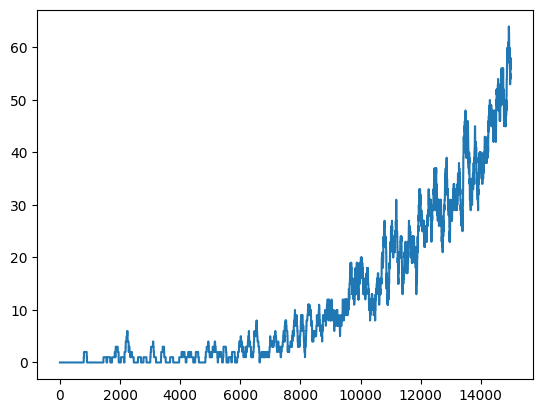

In [ ]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

def run(episodes, render=False):

    env = gym.make('FrozenLake-v1', map_name="8x8", is_slippery=False, render_mode='human' if render else None)

    
    q = np.zeros((env.observation_space.n, env.action_space.n)) # init a 64 x 4 array

    learning_rate_a = 0.9 # alpha or learning rate
    discount_factor_g = 0.9 # gamma or discount rate. Near 0: more weight/reward placed on immediate state. Near 1: more on future state.
    epsilon = 1         # 1 = 100% random actions
    epsilon_decay_rate = 0.00005 # means how fast the episilon decays over the episodes | epsilon_decay_rate = (epsilon - min_epsilon) / episodes
    min_epsilon = 0.01 # means the minimum value of epsilon it can drop to

    rewards_per_episode = np.zeros(episodes)

    for i in range(episodes):
        state = env.reset()[0]  # states: 0 to 63, 0=top left corner,63=bottom right corner
        terminated = False      # True when fall in hole or reached goal
        truncated = False       # True when actions > 200

        while not terminated and not truncated:
            if np.random.rand() < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(q[state])

            new_state,reward,terminated,truncated,_ = env.step(action)

            
            q[state,action] = q[state,action] + learning_rate_a * (reward + discount_factor_g * np.max(q[new_state,:]) - q[state,action])

            state = new_state

        epsilon = max(epsilon - epsilon_decay_rate, min_epsilon)


        if reward == 1:
            rewards_per_episode[i] = 1

    env.close()

    sum_rewards = np.zeros(episodes)
    for t in range(episodes):
        sum_rewards[t] = np.sum(rewards_per_episode[max(0, t-100):(t+1)])
    plt.plot(sum_rewards)


if __name__ == '__main__':
    run(15000)

    # run(1000, is_training=True, render=True)